# Analyse, classification et indexation des données: feuille 7
### Réduction de dimension - Analyse en Composantes Principales (ACP)

In [2]:
import warnings
import numpy as np
warnings.filterwarnings("ignore")

#### Avant de commencer

Ecrire une fonction <code> droite2DVd(x, vd, point) </code> permettant de calculer les ordonnées des points <code>(x, ?)</code> de la droite de vecteur directeur <code>vd</code> passant par le point <code>point</code>. Le paramètre <code>x</code> est un vecteur numpy, <code>vd</code> est un tuple <code>(a,b)</code>, <code>point</code> est un tuple <code>(xp, yp)</code>.
Testez votre fonction.

In [4]:
def droite2DVd(x, vd, point):
    a,b = vd
    xp, yp = point
    y = a*(x - xp) / b + yp
    return y

x_values = np.array([1, 2, 3, 4, 5])
vector_directeur = (2, 3)
point_sur_droite = (1, 2)

y_values = droite2DVd(x_values, vector_directeur, point_sur_droite)

print("Les ordonnées correspondantes aux abscisses sont :", y_values)

Les ordonnées correspondantes aux abscisses sont : [2.         2.66666667 3.33333333 4.         4.66666667]


### Exercice 1.

Dans cet exercice, on considère le même dataset que pour le TD précédent (feuille 6). Nous avons un descripteur de taille 2 : chaque poisson est décrit par sa longueur et sa brillance. L'objectif de l'exercice est de passer d'un descripteur de taille 2 à un descripteur de taille 1.

Commencez par charger les données.


In [7]:
import pandas as pd
df = pd.read_csv('https://www.labri.fr/perso/zemmari/datasets/salmon_seabass.csv', delimiter=';')
df

,lightness,width,species
0,9.710457,8.673699,0
1,6.528089,7.330887,0
2,1.770695,7.599677,0
3,4.819293,7.328198,0
4,6.769638,8.575629,0
...,...,...,...
1495,14.357080,11.631304,1
1496,9.810589,12.803998,1
1497,15.620085,13.078456,1
1498,9.218976,10.532814,1


1- Ecrire   une   fonction  <code>calculACP(echantillon, d=1)</code> qui réalise l'ACP sur un ensemble d'exemples. Chaque ligne de <code>echantillon</code> (DataFrame) contient les descripteurs associés à un exemple. La fonction retourne les <code>d</code> vecteurs propres calculés de plus grandes valeurs propres. Ils seront triés en fonction de leur valeur propre, de la plus grande à la plus petite. Tester la fonction sur le dataset.

In [21]:
echantillon = df
# Calcul de la moyenne de l'axe 0
u = np.mean(echantillon, axis = 0)
# Calcul de la standard deviation axe 0
o = np.std(echantillon, axis = 0)
# Centrage des données
cntr = (echantillon - u) / o

def calculACP(echantillon, d = 1):
    # Var de taille de l'echantillon
    sz = np.size(echantillon)
    # Je sais pas ce que c'est lol (le scatter matrix askip)
    # Je sais pas non plus d'ou ca sort mdrrr
    S = (sz - 1)*cntr.cov()
    #kjdflghmserotjghzùorithjjbzeomihnjoi
    a,v = np.linalg.eig(S)
    #romzejhmositzghmrorithjzroi
    w = v[np.argsort(a)][::-1][:d]
    #Matrice transposée askip
    return w.T

calculACP(df,1)

array([[ 0.54603524],
       [ 0.784342  ],
       [-0.29436905]])

2- Ecrire une fonction <code>projection (W, echantillon)</code>  qui prend une matrice de
projection <code>W</code> et un échantillon et qui retourne la projection de cet
ensemble. 

In [22]:
def projection(w, echantillon):
    # return np.matmul(echantillon, w)
    return np.dot(echantillon, W)

3- Visualiser le résultat de la réduction de dimension sur le dataset. Vous afficherez le nuage de points initial en 2D et la projection de ce nuage en 1D.

##### Avant la projection : 

InvalidIndexError: (slice(None, None, None), 0)

#### Après la projection :

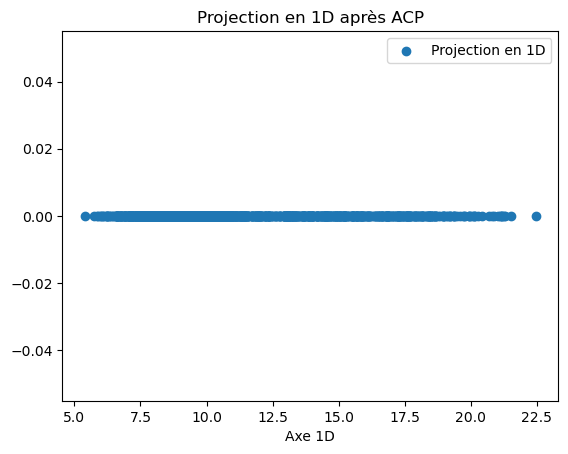

In [16]:
plt.scatter(projection_result, np.zeros_like(projection_result), label='Projection en 1D')
plt.title('Projection en 1D après ACP')
plt.xlabel('Axe 1D')
plt.legend()
plt.show()

4- En utilisant un classifieur bayésien MAP, comparez les résultats obtenus avec l'échantillon brut (descripteur de dimension 2) et les résultats obtenus avec l'échantillon projeté sur l’axe de plus grande valeur propre (descripteur de dimension 1). Comparez également les temps d'entraînement.

5- Même question avec un $k$-nn.

### Exercice 2.

Dans cet exercice, nous allons travailler avec un dataset contenant des données sur le cancer du sein. Le dataset 
peut être chargé par l'instruction <code> load_breast_cancer</code> de la bibliothèque <code>sklearn.datasets</code>.

Commencer par charger les données, et les explorer.



1- Faites une ACP en utilisant le module <code>PCA</code> de la bibliothèque <code>sklearn.decomposition</code>.  

Attention : pensez à centrer et réduire vos données.

2- Affichez l'éboulie des valeurs propres et indiquer le nombre d'axes à retenir en utilisant le critère du coude. 

3- Combien d'axes faut-il retenir pour garder au moins 80% de la variance ?

4- En ne gardant que 3 axes,  étudier l'impact de la réduction sur la qualité d'un classifieur de votre choix. 

5- Commenter les résultats